In [54]:
import sys
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import keras

In [55]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
df = pd.read_csv(url, names=names)

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [58]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [59]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


In [60]:
import seaborn as sns

<AxesSubplot:>

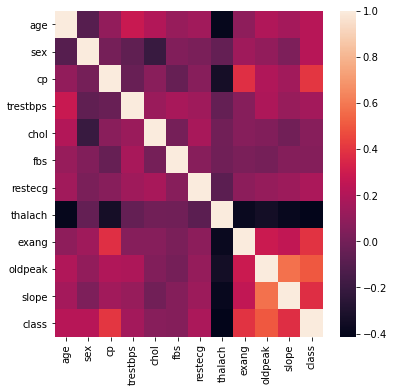

In [61]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())

In [62]:
print(type(df.corr()))

<class 'pandas.core.frame.DataFrame'>


In [63]:
df_corr = df.corr()
column_corr = set()

In [65]:
df['age'].corr(df['class'])

0.22285341927595329

In [66]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [67]:
df = df[df['ca'] != '?']

In [68]:
df.shape

(299, 14)

In [69]:
df = df.dropna(axis=0)

In [70]:
df.shape

(299, 14)

In [71]:
df.iloc[87]

age          53
sex           0
cp            3
trestbps    128
chol        216
fbs           0
restecg       2
thalach     115
exang         0
oldpeak       0
slope         1
ca          0.0
thal          ?
class         0
Name: 87, dtype: object

In [72]:
for i in df.columns:
    print(i)
    print('\n')
    print(df.loc[df[i] == '?'])

age


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
sex


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
cp


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
trestbps


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
chol


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
fbs


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
restecg


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, class]
Index: []
thalach


Empty DataFrame
Columns: [age, sex, 

In [73]:
df.loc[df['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [74]:
df = df.loc[df['thal'] != '?']

In [75]:
df.shape

(297, 14)

In [76]:
df = df.apply(pd.to_numeric)

In [77]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [78]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [79]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

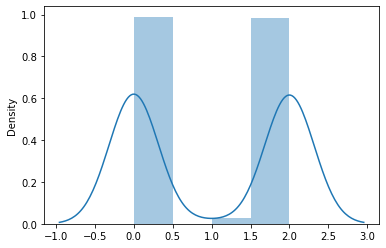

In [82]:
sns.distplot(x=df['restecg'])

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

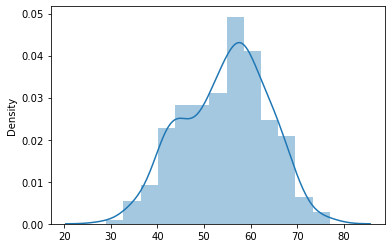

In [83]:
sns.distplot(x=df['age'])

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

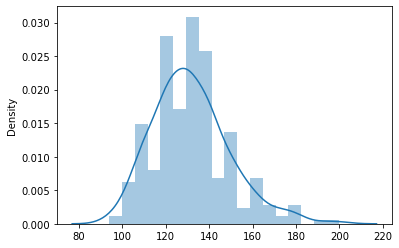

In [84]:
sns.distplot(x=df['trestbps'])

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

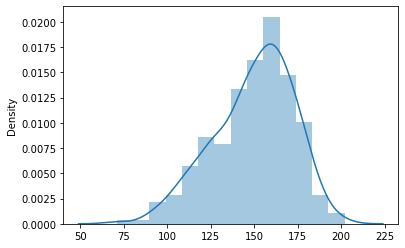

In [85]:
sns.distplot(x=df['thalach'])

In [87]:
columns = ['sex','cp','fbs','exang','slope','ca','class']

In [88]:
for i in columns:
    print(i,':',df[i].unique())

sex : [1. 0.]
cp : [1. 4. 3. 2.]
fbs : [1. 0.]
exang : [0. 1.]
slope : [3. 2. 1.]
ca : [0. 3. 2. 1.]
class : [0 2 1 3 4]


In [89]:
#Feature Selection

In [95]:
#Checking For Imbalanced Dataset

In [117]:
class_label = [0,2,1,3,4]

In [118]:
for i in class_label:
    print(i,':',len(df.loc[df['class'] == i]))

0 : 160
2 : 35
1 : 54
3 : 35
4 : 13


In [120]:
X,y = df[df.columns[:-1]] , df['class']

Upsampling The Data

In [124]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

Class=0, n=160 (20.000%)
Class=2, n=160 (20.000%)
Class=1, n=160 (20.000%)
Class=3, n=160 (20.000%)
Class=4, n=160 (20.000%)


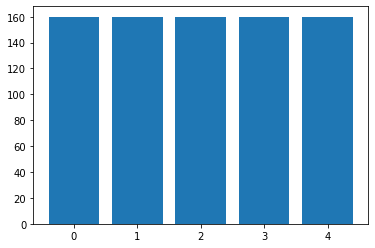

In [125]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [126]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.000000,1.000000,1.00000,145.000000,233.000000,1.0,2.000000,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000
1,67.000000,1.000000,4.00000,160.000000,286.000000,0.0,2.000000,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000
2,67.000000,1.000000,4.00000,120.000000,229.000000,0.0,2.000000,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000
3,37.000000,1.000000,3.00000,130.000000,250.000000,0.0,0.000000,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000
4,41.000000,0.000000,2.00000,130.000000,204.000000,0.0,2.000000,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,61.514129,0.114298,4.00000,150.000000,388.255170,0.0,2.000000,151.028259,0.000000,3.839983,2.000000,2.657107,7.000000
796,67.990766,1.000000,4.00000,143.437263,172.214014,0.0,0.446496,125.000000,1.000000,2.823248,2.776752,0.223248,6.107007
797,55.827471,1.000000,4.00000,138.345058,221.438358,0.0,2.000000,130.330988,0.582747,2.483451,2.000000,1.165494,7.000000
798,64.439535,0.560465,4.00000,147.197675,217.713954,0.0,2.000000,124.088371,0.000000,1.560465,2.000000,2.439535,6.439535


In [128]:
y

0      0
1      2
2      1
3      0
4      0
      ..
795    4
796    4
797    4
798    4
799    4
Name: class, Length: 800, dtype: int64

In [129]:
df_new = pd.concat([X,y],axis=1)

In [130]:
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.000000,1.000000,1.00000,145.000000,233.000000,1.0,2.000000,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000,0
1,67.000000,1.000000,4.00000,160.000000,286.000000,0.0,2.000000,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,2
2,67.000000,1.000000,4.00000,120.000000,229.000000,0.0,2.000000,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1
3,37.000000,1.000000,3.00000,130.000000,250.000000,0.0,0.000000,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000,0
4,41.000000,0.000000,2.00000,130.000000,204.000000,0.0,2.000000,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,61.514129,0.114298,4.00000,150.000000,388.255170,0.0,2.000000,151.028259,0.000000,3.839983,2.000000,2.657107,7.000000,4
796,67.990766,1.000000,4.00000,143.437263,172.214014,0.0,0.446496,125.000000,1.000000,2.823248,2.776752,0.223248,6.107007,4
797,55.827471,1.000000,4.00000,138.345058,221.438358,0.0,2.000000,130.330988,0.582747,2.483451,2.000000,1.165494,7.000000,4
798,64.439535,0.560465,4.00000,147.197675,217.713954,0.0,2.000000,124.088371,0.000000,1.560465,2.000000,2.439535,6.439535,4


In [131]:
for i in class_label:
    print(i,':',len(df_new.loc[df_new['class'] == i]))

0 : 160
2 : 160
1 : 160
3 : 160
4 : 160


In [132]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [134]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
704,67.913973,0.582795,4.000000,147.086027,195.277475,0.00000,0.834411,120.410741,0.582795,1.932471,2.582795,1.251616,7.000000
554,49.605409,1.000000,4.000000,123.710605,213.289395,0.00000,0.000000,162.842419,0.000000,1.036840,1.184199,1.631601,7.000000
636,55.806599,0.201650,4.000000,135.259387,199.152161,0.20165,1.201650,121.934015,0.798350,1.798350,2.000000,1.201650,6.798350
318,60.349081,1.000000,3.023621,138.047243,206.023621,0.00000,1.349081,145.811030,0.674540,1.541994,1.000000,1.325460,5.698162
337,61.636284,0.181858,4.000000,146.362837,245.636723,0.00000,0.000000,152.181418,1.000000,1.400000,1.818142,0.181858,3.727433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,43.020977,1.000000,2.255244,132.552443,236.020977,0.00000,0.836830,159.405603,0.581585,3.297902,2.000000,0.000000,7.000000
475,44.086088,0.850994,4.000000,135.701987,329.006591,0.00000,0.298013,128.725157,1.000000,1.814901,2.000000,0.298013,6.149006
407,61.079569,1.000000,4.000000,140.000000,182.198922,0.00000,1.039784,152.641940,1.000000,2.079569,1.000000,1.519892,7.000000
218,54.000000,0.000000,3.000000,108.000000,267.000000,0.00000,2.000000,167.000000,0.000000,0.000000,1.000000,0.000000,3.000000


Feature Selection using mutual info

In [135]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.16684547, 0.11600927, 0.16900505, 0.20847437, 0.21362131,
       0.08002196, 0.17578439, 0.22901866, 0.15691839, 0.2998012 ,
       0.22445868, 0.28505365, 0.26023422])

In [136]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

oldpeak     0.299801
ca          0.285054
thal        0.260234
thalach     0.229019
slope       0.224459
chol        0.213621
trestbps    0.208474
restecg     0.175784
cp          0.169005
age         0.166845
exang       0.156918
sex         0.116009
fbs         0.080022
dtype: float64

<AxesSubplot:>

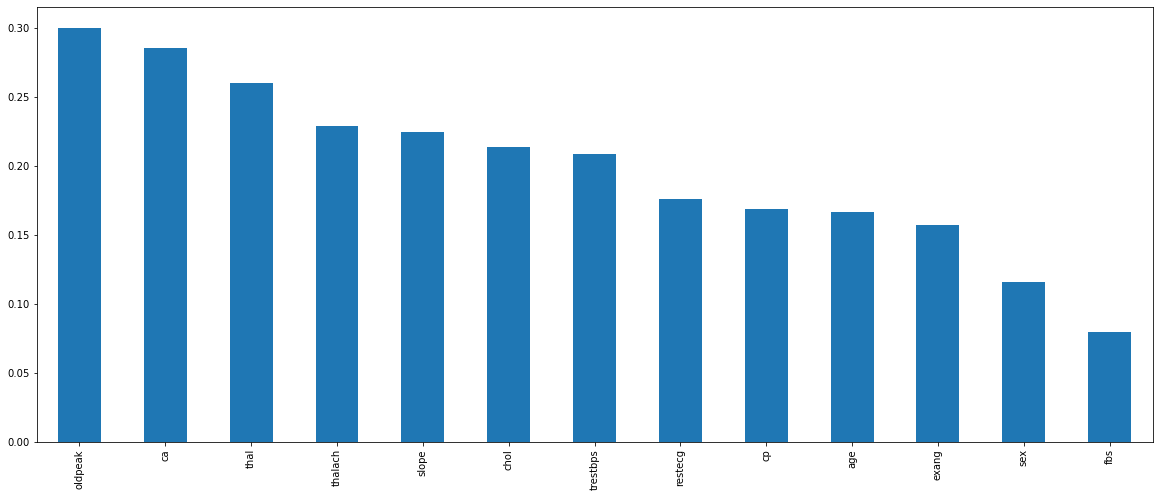

In [137]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [259]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=12)
sel_five_cols.fit(X_train, y_train)
column = X_train.columns[sel_five_cols.get_support()]
column = column.tolist()

In [260]:
X_new = df_new[column]
X_new.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [261]:
Y_new = df_new['class']
Y_new.head()

0    0
1    2
2    1
3    0
4    0
Name: class, dtype: int64

Using The new Splitted Data to train_test_split

In [262]:
# create X and Y datasets for training
from sklearn import model_selection
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X_new, Y_new, test_size = 0.2)

In [263]:
from tensorflow.keras.callbacks import EarlyStopping

In [264]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [265]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [266]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(ytrain, num_classes=None)
Y_test = to_categorical(ytest, num_classes=None)

In [267]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim=12))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))

model.add(Dense(units=5,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics = ['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_53 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 5)                 165       
Total params: 4,773
Trainable params: 4,773
Non-trainable params: 0
_________________________________________________________________


In [268]:
Xtrain

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
9,53.000000,4.000000,140.000000,203.000000,1.000000,2.000000,155.000000,1.000000,3.100000,3.000000,0.000000,7.000000
688,50.450494,3.943688,147.860155,242.267948,0.000000,2.000000,130.083533,0.000000,2.594369,2.000000,0.056312,7.000000
244,47.000000,4.000000,110.000000,275.000000,0.000000,2.000000,118.000000,1.000000,1.000000,2.000000,1.000000,3.000000
552,53.567326,4.000000,128.534914,255.413966,1.000000,1.413966,153.809223,0.706983,0.058603,1.293017,2.000000,7.000000
49,53.000000,3.000000,130.000000,197.000000,1.000000,2.000000,152.000000,0.000000,1.200000,3.000000,0.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59.000000,3.916287,173.609340,249.669703,0.000000,0.055809,142.497723,0.972096,0.000000,1.972096,0.000000,3.000000
48,65.000000,3.000000,140.000000,417.000000,1.000000,2.000000,157.000000,0.000000,0.800000,1.000000,1.000000,3.000000
419,59.000000,3.387089,119.806571,226.128876,0.612911,0.774179,137.096715,0.387089,1.812911,2.000000,1.000000,6.387089
312,52.009307,3.278295,108.556590,244.391474,0.000000,0.556590,153.669769,0.000000,0.166977,1.000000,0.556590,3.834885


In [269]:
model.fit(x=Xtrain, 
          y=Y_train, 
          epochs=150, batch_size=10, verbose = 1,
          validation_data=(Xtest, Y_test)
         
          )

Epoch 1/150
64/64 [==============================] - 1s 9ms/step - loss: 12.1112 - accuracy: 0.1703 - val_loss: 1.8834 - val_accuracy: 0.2250
Epoch 2/150
64/64 [==============================] - 0s 3ms/step - loss: 1.9447 - accuracy: 0.3050 - val_loss: 1.9586 - val_accuracy: 0.2562
Epoch 3/150
64/64 [==============================] - 0s 3ms/step - loss: 1.8404 - accuracy: 0.2850 - val_loss: 1.6542 - val_accuracy: 0.3313
Epoch 4/150
64/64 [==============================] - 0s 3ms/step - loss: 1.8086 - accuracy: 0.2781 - val_loss: 1.5848 - val_accuracy: 0.3438
Epoch 5/150
64/64 [==============================] - 0s 3ms/step - loss: 1.5752 - accuracy: 0.3700 - val_loss: 2.4055 - val_accuracy: 0.2250
Epoch 6/150
64/64 [==============================] - 0s 4ms/step - loss: 1.9743 - accuracy: 0.3090 - val_loss: 1.7115 - val_accuracy: 0.3438
Epoch 7/150
64/64 [==============================] - 0s 3ms/step - loss: 1.4848 - accuracy: 0.3914 - val_loss: 1.4949 - val_accuracy: 0.3625
Epoch 8/150


Epoch 59/150
64/64 [==============================] - 0s 3ms/step - loss: 0.9803 - accuracy: 0.6078 - val_loss: 1.2660 - val_accuracy: 0.5063
Epoch 60/150
64/64 [==============================] - 0s 3ms/step - loss: 0.9652 - accuracy: 0.6165 - val_loss: 1.0433 - val_accuracy: 0.5250
Epoch 61/150
64/64 [==============================] - 0s 3ms/step - loss: 0.9751 - accuracy: 0.6188 - val_loss: 1.2989 - val_accuracy: 0.4375
Epoch 62/150
64/64 [==============================] - 0s 3ms/step - loss: 1.0542 - accuracy: 0.5930 - val_loss: 1.0953 - val_accuracy: 0.5000
Epoch 63/150
64/64 [==============================] - 0s 3ms/step - loss: 0.9234 - accuracy: 0.6171 - val_loss: 1.2382 - val_accuracy: 0.5188
Epoch 64/150
64/64 [==============================] - 0s 4ms/step - loss: 1.0467 - accuracy: 0.5344 - val_loss: 1.2170 - val_accuracy: 0.5125
Epoch 65/150
64/64 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.5728 - val_loss: 1.1201 - val_accuracy: 0.5188
Epoch 

64/64 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.7283 - val_loss: 0.9334 - val_accuracy: 0.6000
Epoch 117/150
64/64 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.7322 - val_loss: 1.0869 - val_accuracy: 0.5625
Epoch 118/150
64/64 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.7436 - val_loss: 0.9108 - val_accuracy: 0.6250
Epoch 119/150
64/64 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.7128 - val_loss: 0.9171 - val_accuracy: 0.6000
Epoch 120/150
64/64 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.7144 - val_loss: 0.8711 - val_accuracy: 0.6562
Epoch 121/150
64/64 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.6932 - val_loss: 1.0184 - val_accuracy: 0.5625
Epoch 122/150
64/64 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.7352 - val_loss: 0.9065 - val_accuracy: 0.7125
Epoch 123/150

<AxesSubplot:>

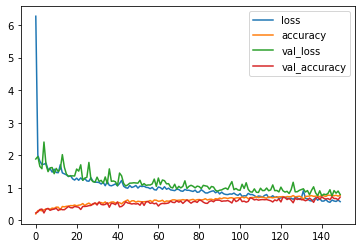

In [270]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [271]:
predictions = model.predict_classes(Xtest)

D:\AnaConda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [272]:
predictions

array([3, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 0, 0, 0, 4, 4, 1, 2, 2, 3, 2, 0,
       2, 1, 1, 2, 3, 4, 2, 3, 1, 2, 3, 2, 1, 2, 4, 4, 4, 2, 1, 2, 2, 0,
       4, 1, 0, 1, 0, 1, 0, 3, 4, 2, 2, 0, 1, 4, 3, 4, 2, 3, 2, 1, 2, 2,
       0, 3, 2, 3, 4, 2, 3, 2, 2, 0, 2, 1, 0, 2, 3, 3, 2, 4, 0, 0, 4, 3,
       2, 3, 0, 3, 3, 3, 3, 2, 3, 1, 0, 3, 2, 3, 2, 1, 0, 0, 0, 1, 2, 3,
       1, 4, 3, 4, 1, 3, 2, 2, 1, 3, 2, 3, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 3, 4, 2, 4, 2, 0, 2, 4, 2, 4, 4, 2, 1, 1, 3, 3, 0, 1, 4,
       3, 2, 4, 4, 2, 1], dtype=int64)

In [275]:
from sklearn.metrics import classification_report,confusion_matrix

In [274]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.76      0.58      0.66        33
           2       0.64      0.87      0.74        39
           3       0.63      0.71      0.67        31
           4       0.96      0.71      0.81        31

    accuracy                           0.71       160
   macro avg       0.74      0.70      0.71       160
weighted avg       0.74      0.71      0.71       160



In [276]:
print(confusion_matrix(ytest,predictions))

[[17  4  4  0  1]
 [ 7 19  4  3  0]
 [ 0  0 34  5  0]
 [ 0  2  7 22  0]
 [ 0  0  4  5 22]]
